In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [10]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [12]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

### GET DATA

In [15]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

32768/30286 [================================] - 0s 10us/step


'C:\\Users\\HP\\.keras\\datasets\\auto-mpg.data'

In [34]:
#load dataset into pandas
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

#na values substitutedd by ?

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [35]:
#DATA CLEANING

dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [36]:
#axis=1 is columsn .. dropping c0lumns with na's
dataset=dataset.dropna(axis=0)

In [37]:
#double check na's
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

#### perfect no na's

## NEXT UP MORE CLEANING

In [38]:
dataset.head()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [39]:
#origin is actually categorical with
# 1=USA
# 2=EUROPE
# 3=JAPAN

#ONE HOT ENCODE

origin=dataset.pop('Origin')

dataset['USA']=1*(origin==1)
dataset['Europe']=2*(origin==2)
dataset['Japan']=3*(origin==3)



In [40]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,2,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,0,0


In [41]:
#split train and test
train_ds=dataset.sample(frac=0.8,random_state=0) #random_state =0 makes sure every time we run this we get same split .
test_ds=dataset.drop(train_ds.index)

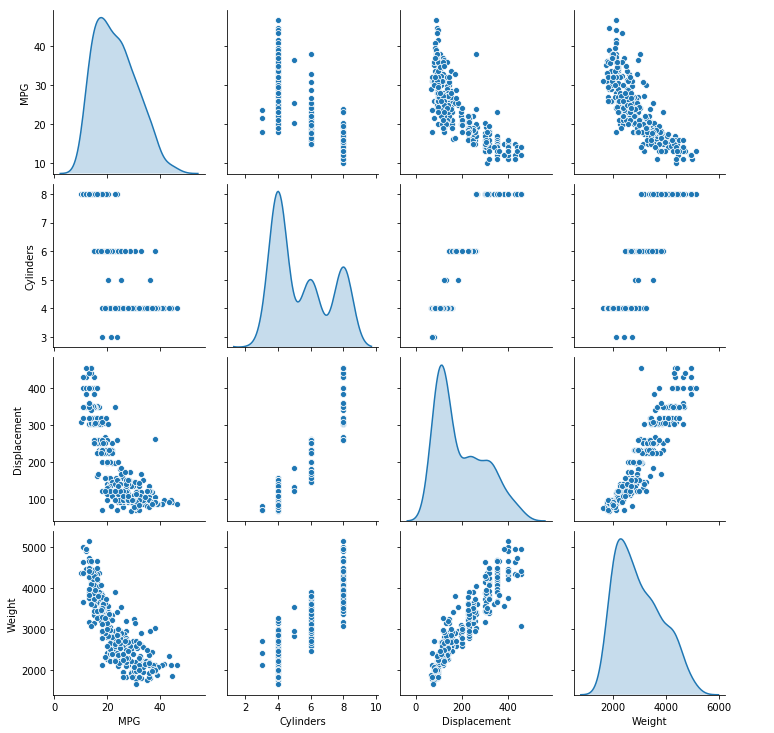

In [42]:
#Inspect Data
sns.pairplot(train_ds[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [43]:
train_labels=train_ds.pop('MPG')
test_labels=test_ds.pop('MPG')

In [44]:
train_ds

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
146,4,90.0,75.0,2125.0,14.5,74,1,0,0
282,4,140.0,88.0,2890.0,17.3,79,1,0,0
69,8,350.0,160.0,4456.0,13.5,72,1,0,0
378,4,105.0,63.0,2125.0,14.7,82,1,0,0
331,4,97.0,67.0,2145.0,18.0,80,0,0,3
...,...,...,...,...,...,...,...,...,...
281,6,200.0,85.0,2990.0,18.2,79,1,0,0
229,8,400.0,180.0,4220.0,11.1,77,1,0,0
150,4,108.0,93.0,2391.0,15.5,74,0,0,3
145,4,83.0,61.0,2003.0,19.0,74,0,0,3


In [49]:
model=keras.Sequential([
    layers.Dense(64,activation='relu',input_shape=[len(train_ds.keys())]),
    layers.Dense(64,activation='relu'),
    layers.Dense(1)
])

optimizer=keras.optimizers.RMSprop(0.01)

model.compile(optimizer=optimizer,loss='mse',metrics=['mae','mse'])

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [53]:
#normalising data
train_stats = train_ds.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.356688,0.766826,0.0,0.00,0.0,0.00,2.0
Japan,314.0,0.592357,1.196135,0.0,0.00,0.0,0.00,3.0


In [55]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_ds)
normed_test_data = norm(test_ds)
normed_train_data.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
146,-0.869348,-1.009459,-0.784052,-1.025303,-0.379759,-0.516397,0.774676,-0.465148,-0.495225
282,-0.869348,-0.530218,-0.442811,-0.118796,0.624102,0.843910,0.774676,-0.465148,-0.495225
69,1.483887,1.482595,1.447140,1.736877,-0.738281,-1.060519,0.774676,-0.465148,-0.495225
378,-0.869348,-0.865687,-1.099044,-1.025303,-0.308055,1.660094,0.774676,-0.465148,-0.495225
331,-0.869348,-0.942365,-0.994047,-1.001603,0.875068,1.115971,-1.286751,-0.465148,2.012852


In [57]:

#model fit wiht callback histroy for early stopping if overfit later on
history=model.fit(normed_train_data,train_labels,epochs=1000,validation_split=0.2,verbose=2,callbacks=[tfdocs.modeling.EpochDots()])

Train on 251 samples, validate on 63 samples
Epoch 1/1000

Epoch: 0, loss:8.0296,  mae:1.9718,  mse:8.0296,  val_loss:11.8225,  val_mae:2.8213,  val_mse:11.8225,  
.251/251 - 0s - loss: 8.0296 - mae: 1.9718 - mse: 8.0296 - val_loss: 11.8225 - val_mae: 2.8213 - val_mse: 11.8225
Epoch 2/1000
.251/251 - 0s - loss: 6.0843 - mae: 1.8051 - mse: 6.0843 - val_loss: 9.6800 - val_mae: 2.4213 - val_mse: 9.6800
Epoch 3/1000
.251/251 - 0s - loss: 10.3519 - mae: 2.1622 - mse: 10.3519 - val_loss: 9.9155 - val_mae: 2.4121 - val_mse: 9.9155
Epoch 4/1000
.251/251 - 0s - loss: 6.4678 - mae: 1.8420 - mse: 6.4678 - val_loss: 9.0775 - val_mae: 2.2321 - val_mse: 9.0775
Epoch 5/1000
.251/251 - 0s - loss: 7.3045 - mae: 1.9917 - mse: 7.3045 - val_loss: 18.6595 - val_mae: 3.2708 - val_mse: 18.6595
Epoch 6/1000
.251/251 - 0s - loss: 5.8558 - mae: 1.7796 - mse: 5.8558 - val_loss: 13.8407 - val_mae: 2.8798 - val_mse: 13.8407
Epoch 7/1000
.251/251 - 0s - loss: 9.6249 - mae: 2.1852 - mse: 9.6249 - val_loss: 9.3875 - 

Epoch 65/1000
.251/251 - 0s - loss: 4.3017 - mae: 1.4925 - mse: 4.3017 - val_loss: 8.3208 - val_mae: 2.2292 - val_mse: 8.3208
Epoch 66/1000
.251/251 - 0s - loss: 5.1260 - mae: 1.6375 - mse: 5.1260 - val_loss: 15.2699 - val_mae: 2.9239 - val_mse: 15.2699
Epoch 67/1000
.251/251 - 0s - loss: 6.5457 - mae: 1.8732 - mse: 6.5457 - val_loss: 8.8950 - val_mae: 2.2374 - val_mse: 8.8950
Epoch 68/1000
.251/251 - 0s - loss: 4.8657 - mae: 1.5270 - mse: 4.8657 - val_loss: 16.9480 - val_mae: 3.0950 - val_mse: 16.9480
Epoch 69/1000
.251/251 - 0s - loss: 6.6756 - mae: 1.9967 - mse: 6.6756 - val_loss: 12.1294 - val_mae: 2.7327 - val_mse: 12.1294
Epoch 70/1000
.251/251 - 0s - loss: 4.1781 - mae: 1.4209 - mse: 4.1781 - val_loss: 10.1781 - val_mae: 2.4220 - val_mse: 10.1781
Epoch 71/1000
.251/251 - 0s - loss: 4.8490 - mae: 1.5935 - mse: 4.8490 - val_loss: 8.4771 - val_mae: 2.2192 - val_mse: 8.4771
Epoch 72/1000
.251/251 - 0s - loss: 5.3990 - mae: 1.5779 - mse: 5.3990 - val_loss: 22.4779 - val_mae: 3.9513 -

Epoch 129/1000
.251/251 - 0s - loss: 4.1895 - mae: 1.4888 - mse: 4.1895 - val_loss: 9.0584 - val_mae: 2.2369 - val_mse: 9.0584
Epoch 130/1000
.251/251 - 0s - loss: 6.1831 - mae: 1.7870 - mse: 6.1831 - val_loss: 9.5861 - val_mae: 2.4100 - val_mse: 9.5861
Epoch 131/1000
.251/251 - 0s - loss: 3.9074 - mae: 1.4196 - mse: 3.9074 - val_loss: 22.2493 - val_mae: 3.4457 - val_mse: 22.2493
Epoch 132/1000
.251/251 - 0s - loss: 5.8627 - mae: 1.7565 - mse: 5.8627 - val_loss: 9.7655 - val_mae: 2.3493 - val_mse: 9.7655
Epoch 133/1000
.251/251 - 0s - loss: 3.7056 - mae: 1.3466 - mse: 3.7056 - val_loss: 24.4448 - val_mae: 3.6048 - val_mse: 24.4448
Epoch 134/1000
.251/251 - 0s - loss: 6.5907 - mae: 1.8053 - mse: 6.5907 - val_loss: 9.9104 - val_mae: 2.4505 - val_mse: 9.9104
Epoch 135/1000
.251/251 - 0s - loss: 5.6811 - mae: 1.6376 - mse: 5.6811 - val_loss: 8.8022 - val_mae: 2.3689 - val_mse: 8.8022
Epoch 136/1000
.251/251 - 0s - loss: 4.9961 - mae: 1.5603 - mse: 4.9961 - val_loss: 13.4422 - val_mae: 2.86

Epoch 193/1000
.251/251 - 0s - loss: 3.7160 - mae: 1.2832 - mse: 3.7160 - val_loss: 8.3219 - val_mae: 2.1779 - val_mse: 8.3219
Epoch 194/1000
.251/251 - 0s - loss: 3.6963 - mae: 1.3700 - mse: 3.6963 - val_loss: 13.8368 - val_mae: 2.7507 - val_mse: 13.8368
Epoch 195/1000
.251/251 - 0s - loss: 6.3795 - mae: 1.9346 - mse: 6.3795 - val_loss: 10.6983 - val_mae: 2.4545 - val_mse: 10.6983
Epoch 196/1000
.251/251 - 0s - loss: 4.3022 - mae: 1.4430 - mse: 4.3022 - val_loss: 11.4066 - val_mae: 2.5122 - val_mse: 11.4066
Epoch 197/1000
.251/251 - 0s - loss: 4.0303 - mae: 1.3945 - mse: 4.0303 - val_loss: 10.0414 - val_mae: 2.4812 - val_mse: 10.0414
Epoch 198/1000
.251/251 - 0s - loss: 4.8164 - mae: 1.5603 - mse: 4.8164 - val_loss: 11.3067 - val_mae: 2.5479 - val_mse: 11.3067
Epoch 199/1000
.251/251 - 0s - loss: 5.3436 - mae: 1.5919 - mse: 5.3436 - val_loss: 9.3040 - val_mae: 2.3297 - val_mse: 9.3040
Epoch 200/1000
.251/251 - 0s - loss: 3.6073 - mae: 1.3480 - mse: 3.6073 - val_loss: 10.5269 - val_mae

Epoch 257/1000
.251/251 - 0s - loss: 4.1707 - mae: 1.4562 - mse: 4.1707 - val_loss: 9.3729 - val_mae: 2.3363 - val_mse: 9.3729
Epoch 258/1000
.251/251 - 0s - loss: 3.7924 - mae: 1.3192 - mse: 3.7924 - val_loss: 17.5249 - val_mae: 3.3338 - val_mse: 17.5249
Epoch 259/1000
.251/251 - 0s - loss: 4.4390 - mae: 1.4965 - mse: 4.4390 - val_loss: 15.3551 - val_mae: 3.1637 - val_mse: 15.3551
Epoch 260/1000
.251/251 - 0s - loss: 3.2285 - mae: 1.2161 - mse: 3.2285 - val_loss: 9.8400 - val_mae: 2.3093 - val_mse: 9.8400
Epoch 261/1000
.251/251 - 0s - loss: 5.6297 - mae: 1.6657 - mse: 5.6297 - val_loss: 9.0566 - val_mae: 2.2723 - val_mse: 9.0566
Epoch 262/1000
.251/251 - 0s - loss: 3.3964 - mae: 1.2112 - mse: 3.3964 - val_loss: 11.2220 - val_mae: 2.5957 - val_mse: 11.2220
Epoch 263/1000
.251/251 - 0s - loss: 3.5363 - mae: 1.2908 - mse: 3.5363 - val_loss: 19.4435 - val_mae: 3.3141 - val_mse: 19.4435
Epoch 264/1000
.251/251 - 0s - loss: 5.1055 - mae: 1.5651 - mse: 5.1055 - val_loss: 9.6152 - val_mae: 2

.251/251 - 0s - loss: 2.8097 - mae: 1.1121 - mse: 2.8097 - val_loss: 8.7016 - val_mae: 2.2323 - val_mse: 8.7016
Epoch 321/1000
.251/251 - 0s - loss: 3.6821 - mae: 1.3099 - mse: 3.6821 - val_loss: 11.0166 - val_mae: 2.6045 - val_mse: 11.0166
Epoch 322/1000
.251/251 - 0s - loss: 4.0907 - mae: 1.4083 - mse: 4.0907 - val_loss: 10.2681 - val_mae: 2.4654 - val_mse: 10.2681
Epoch 323/1000
.251/251 - 0s - loss: 2.4807 - mae: 1.0374 - mse: 2.4807 - val_loss: 11.5493 - val_mae: 2.4899 - val_mse: 11.5493
Epoch 324/1000
.251/251 - 0s - loss: 2.9898 - mae: 1.1894 - mse: 2.9898 - val_loss: 10.2539 - val_mae: 2.3923 - val_mse: 10.2539
Epoch 325/1000
.251/251 - 0s - loss: 4.5056 - mae: 1.6441 - mse: 4.5056 - val_loss: 10.7124 - val_mae: 2.5300 - val_mse: 10.7124
Epoch 326/1000
.251/251 - 0s - loss: 3.5439 - mae: 1.3209 - mse: 3.5439 - val_loss: 13.7780 - val_mae: 2.6798 - val_mse: 13.7780
Epoch 327/1000
.251/251 - 0s - loss: 3.1737 - mae: 1.1760 - mse: 3.1737 - val_loss: 11.9688 - val_mae: 2.4727 - va

Epoch 384/1000
.251/251 - 0s - loss: 2.8244 - mae: 1.1667 - mse: 2.8244 - val_loss: 9.4491 - val_mae: 2.2951 - val_mse: 9.4491
Epoch 385/1000
.251/251 - 0s - loss: 4.4624 - mae: 1.4852 - mse: 4.4624 - val_loss: 10.2701 - val_mae: 2.4423 - val_mse: 10.2701
Epoch 386/1000
.251/251 - 0s - loss: 3.2884 - mae: 1.1847 - mse: 3.2884 - val_loss: 10.3642 - val_mae: 2.4950 - val_mse: 10.3642
Epoch 387/1000
.251/251 - 0s - loss: 3.2515 - mae: 1.2051 - mse: 3.2515 - val_loss: 10.1353 - val_mae: 2.4388 - val_mse: 10.1353
Epoch 388/1000
.251/251 - 0s - loss: 4.2341 - mae: 1.4782 - mse: 4.2341 - val_loss: 9.5879 - val_mae: 2.3072 - val_mse: 9.5879
Epoch 389/1000
.251/251 - 0s - loss: 3.4558 - mae: 1.2467 - mse: 3.4558 - val_loss: 11.3071 - val_mae: 2.4712 - val_mse: 11.3071
Epoch 390/1000
.251/251 - 0s - loss: 3.9745 - mae: 1.3602 - mse: 3.9745 - val_loss: 11.1360 - val_mae: 2.5225 - val_mse: 11.1360
Epoch 391/1000
.251/251 - 0s - loss: 2.9536 - mae: 1.0607 - mse: 2.9536 - val_loss: 9.7182 - val_mae:

Epoch 447/1000
.251/251 - 0s - loss: 3.5964 - mae: 1.3467 - mse: 3.5964 - val_loss: 9.9313 - val_mae: 2.4156 - val_mse: 9.9313
Epoch 448/1000
.251/251 - 0s - loss: 2.5320 - mae: 1.0179 - mse: 2.5320 - val_loss: 12.5643 - val_mae: 2.7996 - val_mse: 12.5643
Epoch 449/1000
.251/251 - 0s - loss: 3.9242 - mae: 1.3536 - mse: 3.9242 - val_loss: 9.2828 - val_mae: 2.3605 - val_mse: 9.2828
Epoch 450/1000
.251/251 - 0s - loss: 3.1352 - mae: 1.1997 - mse: 3.1352 - val_loss: 10.8296 - val_mae: 2.3775 - val_mse: 10.8296
Epoch 451/1000
.251/251 - 0s - loss: 3.1764 - mae: 1.2168 - mse: 3.1764 - val_loss: 10.8017 - val_mae: 2.3486 - val_mse: 10.8017
Epoch 452/1000
.251/251 - 0s - loss: 3.5710 - mae: 1.2438 - mse: 3.5710 - val_loss: 10.2681 - val_mae: 2.4114 - val_mse: 10.2681
Epoch 453/1000
.251/251 - 0s - loss: 3.8279 - mae: 1.2615 - mse: 3.8279 - val_loss: 11.7630 - val_mae: 2.6969 - val_mse: 11.7630
Epoch 454/1000
.251/251 - 0s - loss: 3.0123 - mae: 1.1998 - mse: 3.0123 - val_loss: 10.1517 - val_mae

Epoch 510/1000
.251/251 - 0s - loss: 2.7369 - mae: 1.1878 - mse: 2.7369 - val_loss: 10.2021 - val_mae: 2.3588 - val_mse: 10.2021
Epoch 511/1000
.251/251 - 0s - loss: 3.0882 - mae: 1.1897 - mse: 3.0882 - val_loss: 12.2465 - val_mae: 2.7953 - val_mse: 12.2465
Epoch 512/1000
.251/251 - 0s - loss: 2.8717 - mae: 1.1074 - mse: 2.8717 - val_loss: 10.9288 - val_mae: 2.4802 - val_mse: 10.9288
Epoch 513/1000
.251/251 - 0s - loss: 3.4769 - mae: 1.3483 - mse: 3.4769 - val_loss: 10.8974 - val_mae: 2.3943 - val_mse: 10.8974
Epoch 514/1000
.251/251 - 0s - loss: 2.4539 - mae: 1.0206 - mse: 2.4539 - val_loss: 11.1378 - val_mae: 2.4117 - val_mse: 11.1378
Epoch 515/1000
.251/251 - 0s - loss: 3.4187 - mae: 1.3511 - mse: 3.4187 - val_loss: 11.9572 - val_mae: 2.5450 - val_mse: 11.9572
Epoch 516/1000
.251/251 - 0s - loss: 2.1486 - mae: 0.9326 - mse: 2.1486 - val_loss: 10.2133 - val_mae: 2.3933 - val_mse: 10.2133
Epoch 517/1000
.251/251 - 0s - loss: 3.9753 - mae: 1.3009 - mse: 3.9753 - val_loss: 12.8736 - val

Epoch 574/1000
.251/251 - 0s - loss: 2.2315 - mae: 0.9678 - mse: 2.2315 - val_loss: 12.0981 - val_mae: 2.4670 - val_mse: 12.0981
Epoch 575/1000
.251/251 - 0s - loss: 3.2175 - mae: 1.2515 - mse: 3.2175 - val_loss: 11.3568 - val_mae: 2.4667 - val_mse: 11.3568
Epoch 576/1000
.251/251 - 0s - loss: 2.3630 - mae: 1.0348 - mse: 2.3630 - val_loss: 11.2046 - val_mae: 2.4008 - val_mse: 11.2046
Epoch 577/1000
.251/251 - 0s - loss: 2.4719 - mae: 0.9934 - mse: 2.4719 - val_loss: 15.1065 - val_mae: 3.0998 - val_mse: 15.1065
Epoch 578/1000
.251/251 - 0s - loss: 3.7302 - mae: 1.3803 - mse: 3.7302 - val_loss: 10.7902 - val_mae: 2.3560 - val_mse: 10.7902
Epoch 579/1000
.251/251 - 0s - loss: 1.7047 - mae: 0.7841 - mse: 1.7047 - val_loss: 19.9617 - val_mae: 3.1519 - val_mse: 19.9617
Epoch 580/1000
.251/251 - 0s - loss: 3.8218 - mae: 1.2865 - mse: 3.8218 - val_loss: 12.2007 - val_mae: 2.4499 - val_mse: 12.2007
Epoch 581/1000
.251/251 - 0s - loss: 2.4776 - mae: 1.0251 - mse: 2.4776 - val_loss: 10.8269 - val

Epoch 637/1000
.251/251 - 0s - loss: 3.9009 - mae: 1.2385 - mse: 3.9009 - val_loss: 12.5432 - val_mae: 2.7548 - val_mse: 12.5432
Epoch 638/1000
.251/251 - 0s - loss: 1.9761 - mae: 0.8767 - mse: 1.9761 - val_loss: 11.6934 - val_mae: 2.6237 - val_mse: 11.6934
Epoch 639/1000
.251/251 - 0s - loss: 2.6080 - mae: 1.0735 - mse: 2.6080 - val_loss: 13.5068 - val_mae: 2.5568 - val_mse: 13.5068
Epoch 640/1000
.251/251 - 0s - loss: 1.7215 - mae: 0.8156 - mse: 1.7215 - val_loss: 14.7093 - val_mae: 2.6056 - val_mse: 14.7093
Epoch 641/1000
.251/251 - 0s - loss: 3.9337 - mae: 1.3018 - mse: 3.9337 - val_loss: 12.0732 - val_mae: 2.5075 - val_mse: 12.0732
Epoch 642/1000
.251/251 - 0s - loss: 2.3569 - mae: 0.9931 - mse: 2.3569 - val_loss: 10.4975 - val_mae: 2.4255 - val_mse: 10.4975
Epoch 643/1000
.251/251 - 0s - loss: 1.8254 - mae: 0.8449 - mse: 1.8254 - val_loss: 12.4696 - val_mae: 2.5916 - val_mse: 12.4696
Epoch 644/1000
.251/251 - 0s - loss: 1.9721 - mae: 0.9849 - mse: 1.9721 - val_loss: 14.0806 - val

Epoch 701/1000

Epoch: 700, loss:2.0935,  mae:0.9135,  mse:2.0935,  val_loss:11.4651,  val_mae:2.3621,  val_mse:11.4651,  
.251/251 - 0s - loss: 2.0935 - mae: 0.9135 - mse: 2.0935 - val_loss: 11.4651 - val_mae: 2.3621 - val_mse: 11.4651
Epoch 702/1000
.251/251 - 0s - loss: 2.9195 - mae: 1.1190 - mse: 2.9195 - val_loss: 12.5828 - val_mae: 2.4042 - val_mse: 12.5828
Epoch 703/1000
.251/251 - 0s - loss: 2.0829 - mae: 1.0473 - mse: 2.0829 - val_loss: 12.6155 - val_mae: 2.4620 - val_mse: 12.6155
Epoch 704/1000
.251/251 - 0s - loss: 2.3551 - mae: 1.1032 - mse: 2.3551 - val_loss: 12.4172 - val_mae: 2.4485 - val_mse: 12.4172
Epoch 705/1000
.251/251 - 0s - loss: 2.1653 - mae: 1.0011 - mse: 2.1653 - val_loss: 11.5651 - val_mae: 2.3661 - val_mse: 11.5651
Epoch 706/1000
.251/251 - 0s - loss: 1.7231 - mae: 0.8599 - mse: 1.7231 - val_loss: 11.4781 - val_mae: 2.5860 - val_mse: 11.4781
Epoch 707/1000
.251/251 - 0s - loss: 2.8214 - mae: 1.1435 - mse: 2.8214 - val_loss: 13.7066 - val_mae: 2.4622 - val_ms

Epoch 764/1000
.251/251 - 0s - loss: 2.0064 - mae: 0.9404 - mse: 2.0064 - val_loss: 13.2413 - val_mae: 2.6053 - val_mse: 13.2413
Epoch 765/1000
.251/251 - 0s - loss: 2.3607 - mae: 1.0229 - mse: 2.3607 - val_loss: 13.5418 - val_mae: 2.4484 - val_mse: 13.5418
Epoch 766/1000
.251/251 - 0s - loss: 2.6061 - mae: 1.1724 - mse: 2.6061 - val_loss: 12.4769 - val_mae: 2.3830 - val_mse: 12.4769
Epoch 767/1000
.251/251 - 0s - loss: 1.6553 - mae: 0.8432 - mse: 1.6553 - val_loss: 12.1591 - val_mae: 2.6386 - val_mse: 12.1591
Epoch 768/1000
.251/251 - 0s - loss: 2.2612 - mae: 1.0043 - mse: 2.2612 - val_loss: 17.1665 - val_mae: 2.7499 - val_mse: 17.1665
Epoch 769/1000
.251/251 - 0s - loss: 1.8359 - mae: 0.9118 - mse: 1.8359 - val_loss: 15.3753 - val_mae: 2.5166 - val_mse: 15.3753
Epoch 770/1000
.251/251 - 0s - loss: 2.0996 - mae: 0.9438 - mse: 2.0996 - val_loss: 12.3694 - val_mae: 2.6383 - val_mse: 12.3694
Epoch 771/1000
.251/251 - 0s - loss: 1.8780 - mae: 0.9921 - mse: 1.8780 - val_loss: 12.5789 - val

Epoch 827/1000
.251/251 - 0s - loss: 2.7302 - mae: 1.1882 - mse: 2.7302 - val_loss: 13.3378 - val_mae: 2.5383 - val_mse: 13.3378
Epoch 828/1000
.251/251 - 0s - loss: 1.9800 - mae: 0.8817 - mse: 1.9800 - val_loss: 11.1019 - val_mae: 2.5206 - val_mse: 11.1019
Epoch 829/1000
.251/251 - 0s - loss: 2.2110 - mae: 1.0922 - mse: 2.2110 - val_loss: 11.2910 - val_mae: 2.5006 - val_mse: 11.2910
Epoch 830/1000
.251/251 - 0s - loss: 1.4595 - mae: 0.7890 - mse: 1.4595 - val_loss: 12.0026 - val_mae: 2.4462 - val_mse: 12.0026
Epoch 831/1000
.251/251 - 0s - loss: 2.2393 - mae: 1.0821 - mse: 2.2393 - val_loss: 12.9323 - val_mae: 2.7101 - val_mse: 12.9323
Epoch 832/1000
.251/251 - 0s - loss: 2.7564 - mae: 1.1398 - mse: 2.7564 - val_loss: 14.4171 - val_mae: 2.9863 - val_mse: 14.4171
Epoch 833/1000
.251/251 - 0s - loss: 2.5200 - mae: 1.0611 - mse: 2.5200 - val_loss: 11.0502 - val_mae: 2.4509 - val_mse: 11.0502
Epoch 834/1000
.251/251 - 0s - loss: 2.5039 - mae: 1.0318 - mse: 2.5039 - val_loss: 13.3317 - val

Epoch 891/1000
.251/251 - 0s - loss: 2.2329 - mae: 1.0685 - mse: 2.2329 - val_loss: 12.5812 - val_mae: 2.5124 - val_mse: 12.5812
Epoch 892/1000
.251/251 - 0s - loss: 1.7404 - mae: 0.8391 - mse: 1.7404 - val_loss: 12.3671 - val_mae: 2.5857 - val_mse: 12.3671
Epoch 893/1000
.251/251 - 0s - loss: 1.7903 - mae: 0.8868 - mse: 1.7903 - val_loss: 11.9568 - val_mae: 2.4365 - val_mse: 11.9568
Epoch 894/1000
.251/251 - 0s - loss: 2.0514 - mae: 1.0130 - mse: 2.0514 - val_loss: 11.5806 - val_mae: 2.4084 - val_mse: 11.5806
Epoch 895/1000
.251/251 - 0s - loss: 2.1555 - mae: 1.0769 - mse: 2.1555 - val_loss: 13.6658 - val_mae: 2.4759 - val_mse: 13.6658
Epoch 896/1000
.251/251 - 0s - loss: 2.4107 - mae: 0.9607 - mse: 2.4107 - val_loss: 15.3101 - val_mae: 3.0479 - val_mse: 15.3101
Epoch 897/1000
.251/251 - 0s - loss: 2.2021 - mae: 0.9344 - mse: 2.2021 - val_loss: 12.4167 - val_mae: 2.4552 - val_mse: 12.4167
Epoch 898/1000
.251/251 - 0s - loss: 2.1582 - mae: 0.9358 - mse: 2.1582 - val_loss: 13.0697 - val

Epoch 954/1000
.251/251 - 0s - loss: 2.8874 - mae: 1.0544 - mse: 2.8874 - val_loss: 12.6055 - val_mae: 2.6656 - val_mse: 12.6055
Epoch 955/1000
.251/251 - 0s - loss: 1.5224 - mae: 0.7854 - mse: 1.5224 - val_loss: 13.6167 - val_mae: 2.4704 - val_mse: 13.6167
Epoch 956/1000
.251/251 - 0s - loss: 1.7917 - mae: 0.8534 - mse: 1.7917 - val_loss: 12.3787 - val_mae: 2.4081 - val_mse: 12.3787
Epoch 957/1000
.251/251 - 0s - loss: 1.5212 - mae: 0.8816 - mse: 1.5212 - val_loss: 12.2739 - val_mae: 2.4743 - val_mse: 12.2739
Epoch 958/1000
.251/251 - 0s - loss: 1.7986 - mae: 0.9262 - mse: 1.7986 - val_loss: 10.9516 - val_mae: 2.3237 - val_mse: 10.9516
Epoch 959/1000
.251/251 - 0s - loss: 2.0080 - mae: 0.9266 - mse: 2.0080 - val_loss: 16.0117 - val_mae: 3.1406 - val_mse: 16.0117
Epoch 960/1000
.251/251 - 0s - loss: 1.9394 - mae: 0.9034 - mse: 1.9394 - val_loss: 10.8666 - val_mae: 2.3234 - val_mse: 10.8666
Epoch 961/1000
.251/251 - 0s - loss: 1.6946 - mae: 0.8780 - mse: 1.6946 - val_loss: 16.0077 - val

Text(0, 0.5, 'MAE [MPG]')

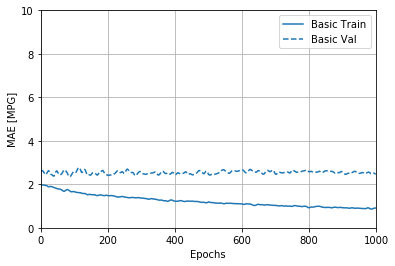

In [58]:
#plotting hiostory
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

Text(0, 0.5, 'MSE [MPG^2]')

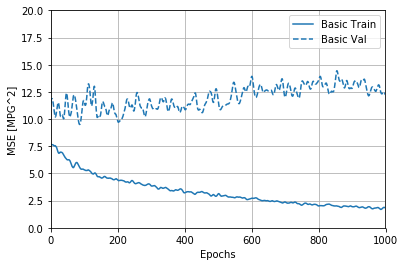

In [59]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE [MPG^2]')

In [60]:
#early stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=1000, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:1.9031,  mae:0.9597,  mse:1.9031,  val_loss:15.7634,  val_mae:2.7999,  val_mse:15.7634,  
...........................

In [64]:
#early stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=1000, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])



Epoch: 0, loss:1.2877,  mae:0.7490,  mse:1.2877,  val_loss:12.4128,  val_mae:2.3732,  val_mse:12.4128,  
.............

In [65]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

78/78 - 0s - loss: 10.9025 - mae: 2.3576 - mse: 10.9025
Testing set Mean Abs Error:  2.36 MPG
